In [ ]:
'''
For the CEREALS dataset, answer the specified questions with summarization and effective visuals.
Write down your insights into the notebook as comments. 
1. How many cereals(unique brands) are there in the dataset?
2. How many cereals are listed per manufacturer of the cereal?
3. How many hot vs cold cereals?
4. Which is the best and worst cereal?
5. Compare the rating for hot vs cold cereals. Which do people prefer?
6. Which cereals have the highest fiber and lowest sugar?
7. Which Cereals that have more than 3 grams of protein?
8. Tabulate and visualize Cereals by display Shelf.
9. How does the sugar content vary across different brands?
10. What is the average calories in cereals per manufacturer?
11. What is the average nutritional content (calories, sugars, protein, fiber, etc.) across all cereals?
12. What is the relationship between sugar and calories?
13. How does the sugar content compare in cereals with high vs. low ratings?
14. Do cereals marketed as "healthy" (e.g., high fiber, low sugar) tend to have higher ratings?
15. Is there a relationship between rating and display shelf?
'''
# Week 6, Code 2
# Nityant Agarwal, CC, 240953418

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_cereals = "Cereals.csv"
cereal_data = pd.read_csv(path_to_cereals)
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13,12,25,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17,3,110,25,1,1.0,1.00,51.592193


In [3]:
cereal_data = cereal_data.replace('?', np.nan)
l = ['carbo', 'sugars', 'potass']
cereal_data[l] = cereal_data[l].apply(pd.to_numeric, errors='coerce')
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [7]:
print(cereal_data.dtypes)

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


In [9]:
numeric_columns = ['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
cereal_data[numeric_columns] = cereal_data[numeric_columns].apply(lambda x: x.fillna(x.mean()))
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [21]:
# 1. How many cereals(unique brands) are there in the dataset?
print("Unique Cereals:",cereal_data.name.nunique())

Unique Cereals: 76


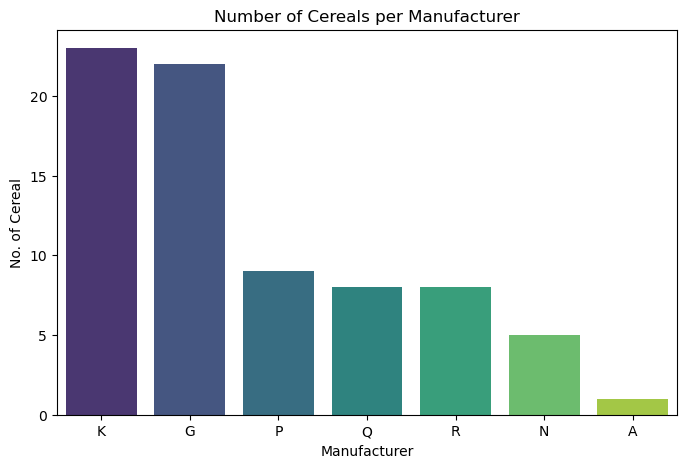

In [41]:
# 2. How many cereals are listed per manufacturer of the cereal?
cereals_per_mfr = cereal_data.mfr.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=cereals_per_mfr.index, y=cereals_per_mfr.values,hue=cereals_per_mfr.index,palette="viridis",legend=False)
plt.xlabel("Manufacturer")
plt.ylabel("No. of Cereal")
plt.title("Number of Cereals per Manufacturer")
plt.show()

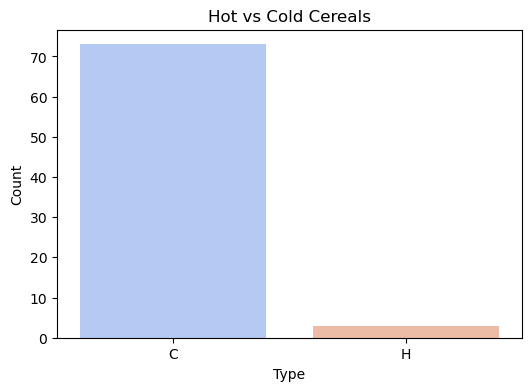

In [47]:
# 3. How many hot vs cold cereals?
h_v_c = cereal_data.type.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=h_v_c.index, y=h_v_c.values,hue=h_v_c.index,palette="coolwarm",legend=False)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Hot vs Cold Cereals")
plt.show()

In [49]:
# 4. Which is the best and worst cereal?
best_cereal = cereal_data.loc[cereal_data.rating.idxmax(),["name","rating"]]
worst_cereal = cereal_data.loc[cereal_data.rating.idxmin(),["name","rating"]]
print(f"Best Cereal:{best_cereal["name"]} (Rating:{best_cereal["rating"]:.2f})")
print(f"Worst Cereal:{worst_cereal["name"]} (Rating:{worst_cereal["rating"]:.2f})")

Best Cereal:All-BranwithExtraFiber (Rating:93.70)
Worst Cereal:CapnCrunch (Rating:18.04)



Average Rating for Hot vs Cold Cereals:
type
C    41.734838
H    56.737708
Name: rating, dtype: float64


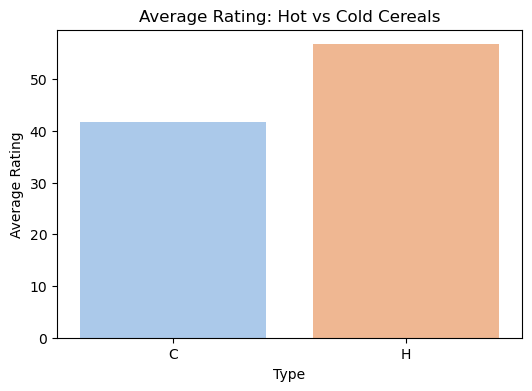

In [55]:
# 5. Compare rating for hot vs cold cereals
hot_cold_ratings = cereal_data.groupby("type")["rating"].mean()
print("\nAverage Rating for Hot vs Cold Cereals:")
print(hot_cold_ratings)

plt.figure(figsize=(6, 4))
sns.barplot(x=hot_cold_ratings.index, y=hot_cold_ratings.values,hue=hot_cold_ratings.index, palette="pastel",legend=False )
plt.xlabel("Type")
plt.ylabel("Average Rating")
plt.title("Average Rating: Hot vs Cold Cereals")
plt.show()

In [59]:
# 6. Cereals with highest fiber & lowest sugar
highest_fiber = cereal_data.loc[cereal_data["fiber"].idxmax(), ["name", "fiber"]]
lowest_sugar = cereal_data.loc[cereal_data["sugars"].idxmin(), ["name", "sugars"]]
print(f"\nCereal with Highest Fiber: {highest_fiber['name']} ({highest_fiber['fiber']}g)")
print(f"Cereal with Lowest Sugar: {lowest_sugar['name']} ({lowest_sugar['sugars']}g)")


Cereal with Highest Fiber: All-BranwithExtraFiber (14.0g)
Cereal with Lowest Sugar: All-BranwithExtraFiber (0.0g)


In [61]:
# 7. Cereals with more than 3g of protein
high_protein_cereals = cereal_data[cereal_data["protein"] > 3][["name", "protein"]]
print("\nCereals with more than 3g of protein:")
print(high_protein_cereals)


Cereals with more than 3g of protein:
                          name  protein
1                     All-Bran        4
2       All-BranwithExtraFiber        4
10                    Cheerios        6
40                        Life        4
42                       Maypo        4
43   MuesliRaisinsDatesAlmonds        4
44  MuesliRaisinsPeachesPecans        4
55            QuakerOatSquares        4
56               QuakerOatmeal        5
66                    SpecialK        6


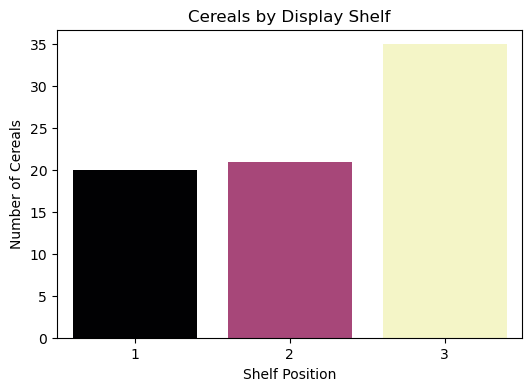

In [67]:
# 8. Tabulate and visualize cereals by display shelf
shelf_counts = cereal_data["shelf"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=shelf_counts.index, y=shelf_counts.values,hue=shelf_counts.index, palette="magma",legend=False )
plt.xlabel("Shelf Position")
plt.ylabel("Number of Cereals")
plt.title("Cereals by Display Shelf")
plt.show()

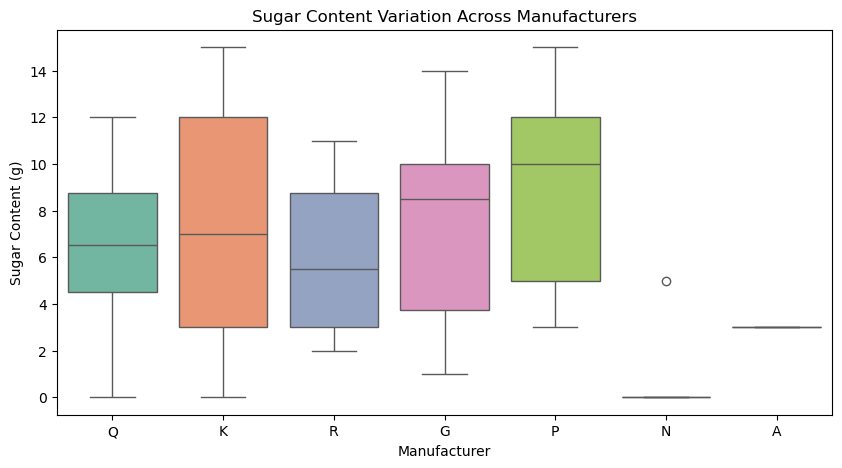

In [71]:
# 9. Sugar content variation across brands
plt.figure(figsize=(10, 5))
sns.boxplot(x="mfr", y="sugars",hue="mfr", data=cereal_data, palette="Set2", legend=False)
plt.xlabel("Manufacturer")
plt.ylabel("Sugar Content (g)")
plt.title("Sugar Content Variation Across Manufacturers")
plt.show()

In [75]:
# 10. Average calories per manufacturer
avg_calories = cereal_data.groupby("mfr")["calories"].mean()
print("\nAverage Calories per Manufacturer:")
print(avg_calories)


Average Calories per Manufacturer:
mfr
A    100.000000
G    111.363636
K    108.695652
N     90.000000
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64


In [77]:
# 11. Average nutritional content
avg_nutrition = cereal_data.mean(numeric_only=True)
print("\nAverage Nutritional Content Across All Cereals:")
print(avg_nutrition)


Average Nutritional Content Across All Cereals:
calories    107.368421
protein       2.526316
fat           1.013158
sodium      160.065789
fiber         2.048684
carbo        14.933333
sugars        7.040000
potass       96.216216
vitamins     28.289474
shelf         2.197368
weight        1.030000
cups          0.827500
rating       42.327057
dtype: float64


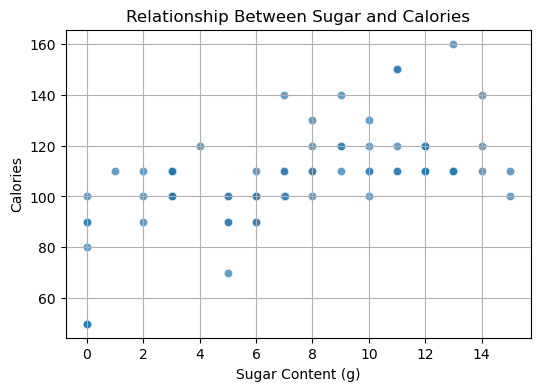

In [87]:
# 12. Relationship between sugar and calories
plt.figure(figsize=(6, 4))
sns.scatterplot(x=cereal_data["sugars"], y=cereal_data["calories"], alpha=0.7)
plt.xlabel("Sugar Content (g)")
plt.ylabel("Calories")
plt.title("Relationship Between Sugar and Calories")
plt.grid(True)
plt.show()

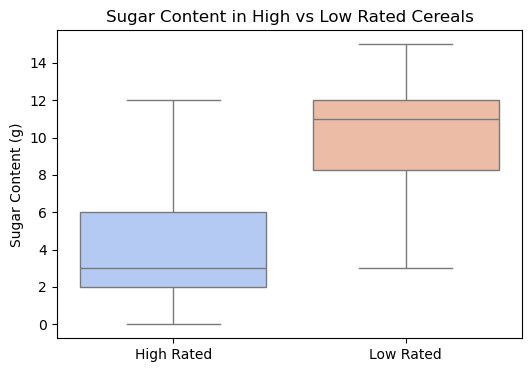

In [99]:
# 13. Sugar content in high vs low-rated cereals
high_rated = cereal_data[cereal_data["rating"] > cereal_data["rating"].median()]["sugars"]
low_rated = cereal_data[cereal_data["rating"] <= cereal_data["rating"].median()]["sugars"]
sugar_data = pd.DataFrame({"High Rated": high_rated, "Low Rated": low_rated})
plt.figure(figsize=(6, 4))
sns.boxplot(data=sugar_data, palette="coolwarm")
plt.ylabel("Sugar Content (g)")
plt.title("Sugar Content in High vs Low Rated Cereals")
plt.show()

In [101]:
# 14. Do healthy cereals have higher ratings?
healthy_cereals = cereal_data[(cereal_data["fiber"] > 3) & (cereal_data["sugars"] < 5)]
print("\nHealthy Cereals (High Fiber, Low Sugar) Ratings:")
print(healthy_cereals[["name", "rating"]])


Healthy Cereals (High Fiber, Low Sugar) Ratings:
                      name     rating
2   All-BranwithExtraFiber  93.704912
63      ShreddedWheatnBran  74.472949


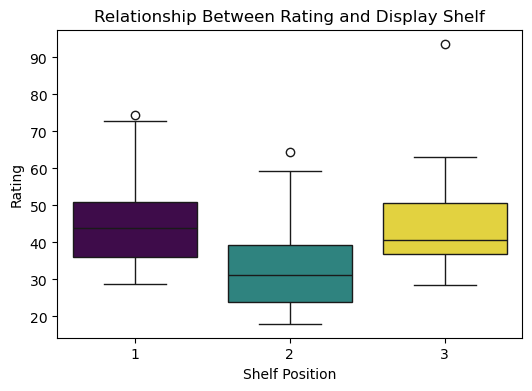

In [105]:
# 15. Relationship between rating and display shelf
plt.figure(figsize=(6, 4))
sns.boxplot(x="shelf", y="rating",hue="shelf", data=cereal_data, palette="viridis", legend=False)
plt.xlabel("Shelf Position")
plt.ylabel("Rating")
plt.title("Relationship Between Rating and Display Shelf")
plt.show()